
**Introduction to Data Science Project 2**
* Name : Priyanka Nigade

**Dataset used -**https://archive.ics.uci.edu/ml/machine-learning-databases/00222/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

# calculate cross validation score and under the roc curve socring
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


### Classification - A predictive modeling problem where a target/label is predicted for a given example of input data

In [2]:
#conda install py-xgboost
#pip install imblearn
#pip install xgboost 

In [3]:
# Load data from CSV file

path = 'bank-additional/bank-additional-full.csv'
bank_df = pd.read_csv(path, sep = ';')
bank_df.shape

(41188, 21)

In [4]:
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


###  Check for missing, null, NaN records.

In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Check for Duplicate records

In [8]:
bank_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [9]:
# bank_df.duplicated().sum()

In [10]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) <br>
4 - education (categorical: <br>'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') <br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') <br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') <br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) <br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) <br>
14 - previous: number of contacts performed before this campaign and for this client (numeric) <br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

Output variable (desired target):<br>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



### Rename columns

In [11]:
# Renaming columns with meangingful name for understanding purpose
bank_df.rename(columns={"emp.var.rate":"emp_var_rate", "cons.price.idx":"cons_price_idx", "cons.conf.idx":"cons_conf_idx", "nr.employed":"euribor_employed", "y":"target"}, inplace=True)
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,euribor_employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Distribution of numeric values

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp_var_rate'}>],
       [<AxesSubplot:title={'center':'cons_price_idx'}>,
        <AxesSubplot:title={'center':'cons_conf_idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'euribor_employed'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

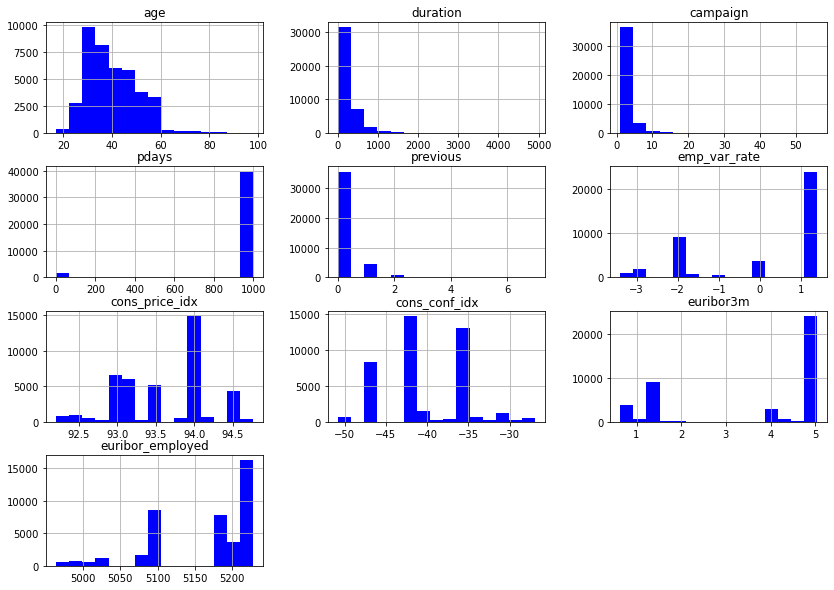

In [12]:
bank_df.hist(figsize=(14,10),bins=15,color='b')

Text(0.5, 1.0, 'Yes and No to Term Deposit')

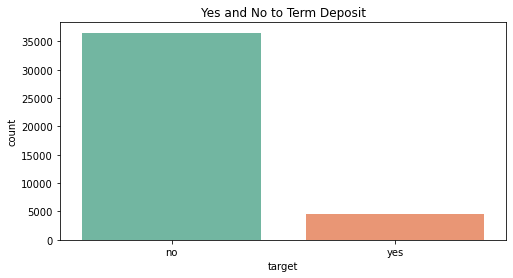

In [13]:
#Check how many customers open Deposit : target ='yes'
plt.figure(figsize=(8,4))
sns.countplot(x='target',data=bank_df,palette='Set2')
plt.title('Yes and No to Term Deposit')

#### Data is imbalanced

#### Visualization of  Categorical values Vs. Deposite/Target

Text(0.5, 1.0, 'Job vs Term Deposit')

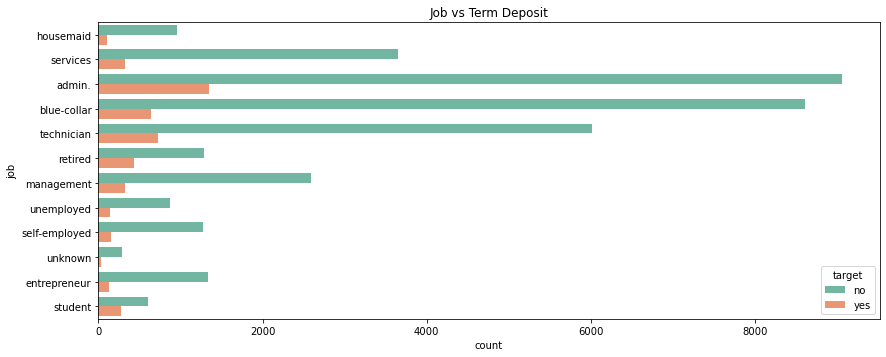

In [14]:
#Job vs Target
plt.figure(figsize=(14,12))

plt.subplot(211)
sns.countplot(y='job',data=bank_df,hue='target',palette='Set2')
plt.title('Job vs Term Deposit')

Text(0.5, 1.0, 'marital vs Term Deposit')

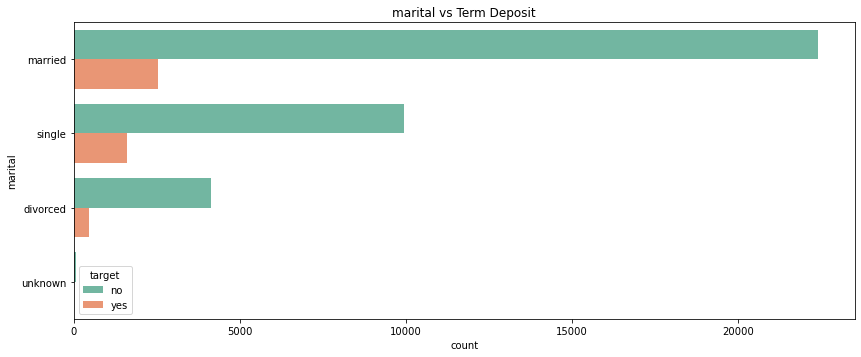

In [15]:
#Marital vs Target
plt.figure(figsize=(14,12))

plt.subplot(211)
sns.countplot(y='marital',data=bank_df,hue='target',palette='Set2')
plt.title('marital vs Term Deposit')

Text(0.5, 1.0, 'Education vs Term Deposit')

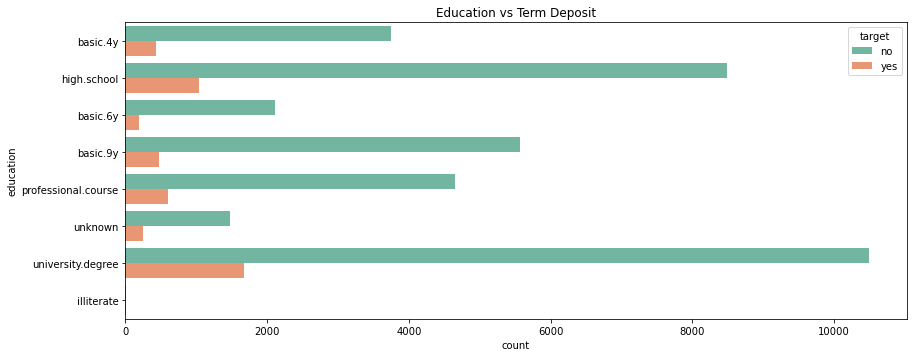

In [16]:
#Education vs Target
plt.figure(figsize=(14,12))

plt.subplot(211)
sns.countplot(y='education',data=bank_df,hue='target',palette='Set2')
plt.title('Education vs Term Deposit')

Text(0.5, 1.0, 'default vs Term Deposit')

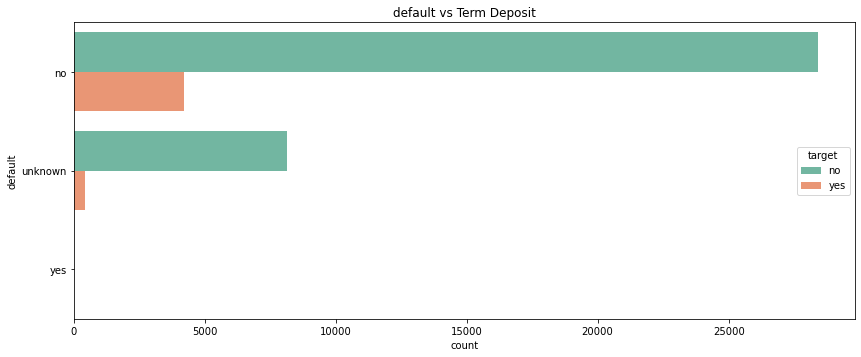

In [17]:
#default vs Target
plt.figure(figsize=(14,12))

plt.subplot(211)
sns.countplot(y='default',data=bank_df,hue='target',palette='Set2')
plt.title('default vs Term Deposit')

Text(0.5, 1.0, 'housing vs Term Deposit')

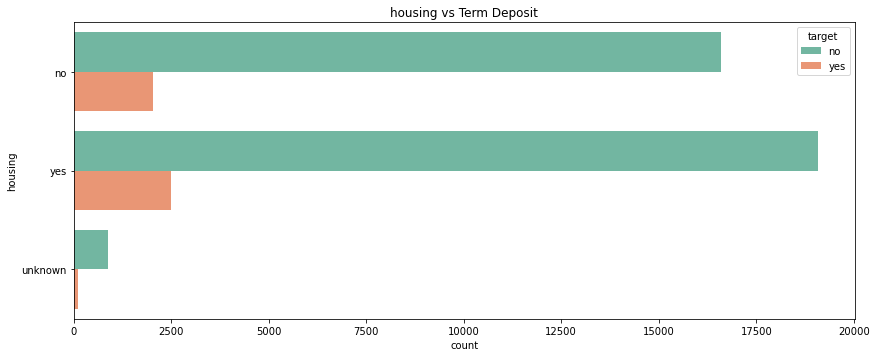

In [18]:
#housing vs Target
plt.figure(figsize=(14,12))

plt.subplot(211)
sns.countplot(y='housing',data=bank_df,hue='target',palette='Set2')
plt.title('housing vs Term Deposit')

Text(0.5, 1.0, 'personal loan vs Term Deposit')

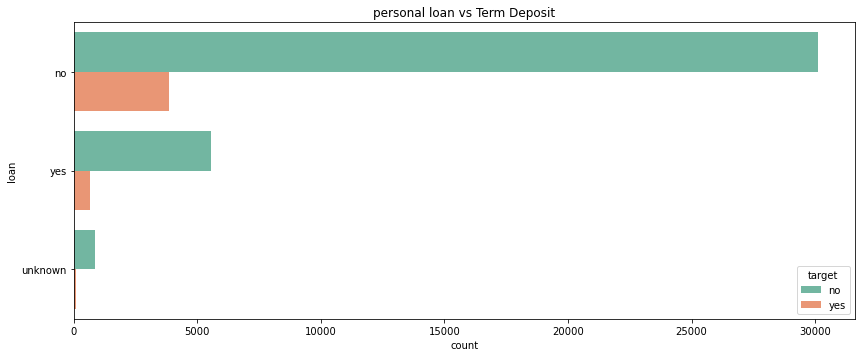

In [19]:
# personal loan vs Target
plt.figure(figsize=(14,12))

plt.subplot(211)
sns.countplot(y='loan',data=bank_df,hue='target',palette='Set2')
plt.title('personal loan vs Term Deposit')

Text(0.5, 1.0, 'contact vs Term Deposit')

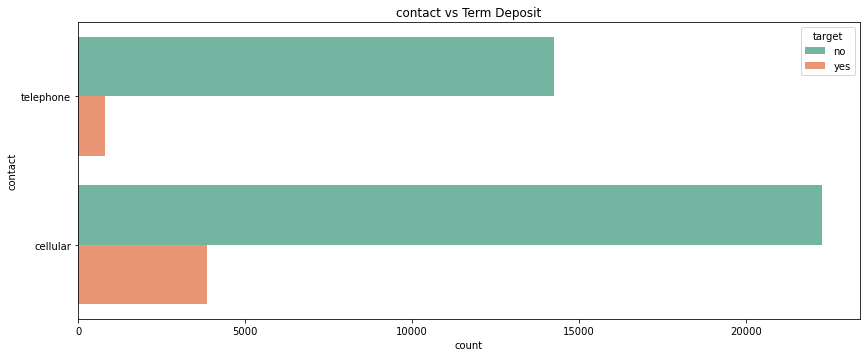

In [20]:
#contact vs Target
plt.figure(figsize=(14,12))

plt.subplot(211)
sns.countplot(y='contact',data=bank_df,hue='target',palette='Set2')
plt.title('contact vs Term Deposit')

Text(0.5, 1.0, 'month vs Term Deposit')

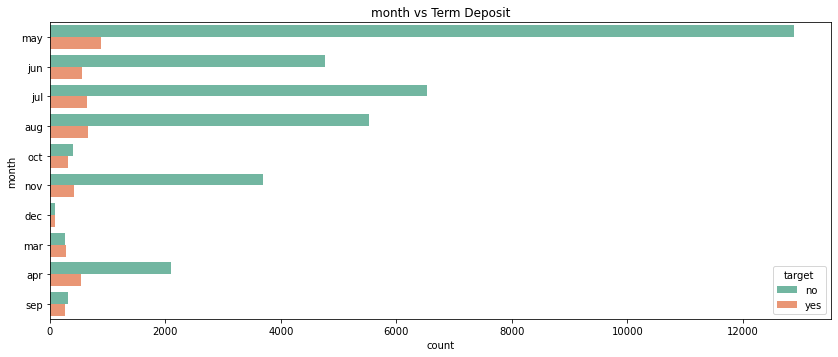

In [21]:
#month vs Target
plt.figure(figsize=(14,12))

plt.subplot(211)
sns.countplot(y='month',data=bank_df,hue='target',palette='Set2')
plt.title('month vs Term Deposit')

Text(0.5, 1.0, 'day of week vs Term Deposit')

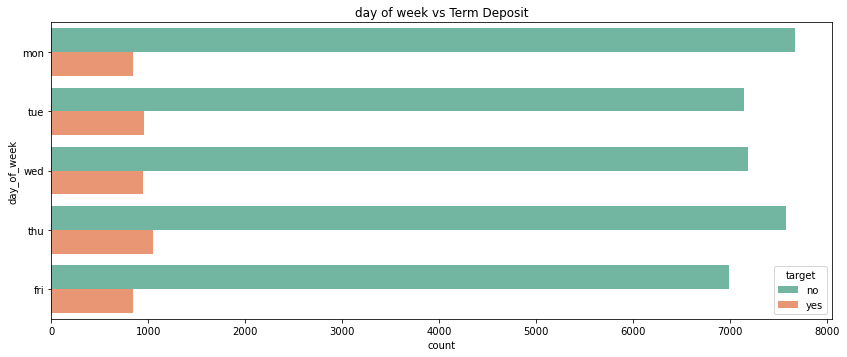

In [22]:
#day of week vs Target
plt.figure(figsize=(14,12))

plt.subplot(211)
sns.countplot(y='day_of_week',data=bank_df,hue='target',palette='Set2')
plt.title('day of week vs Term Deposit')

Text(0.5, 1.0, 'poutcome vs Term Deposit')

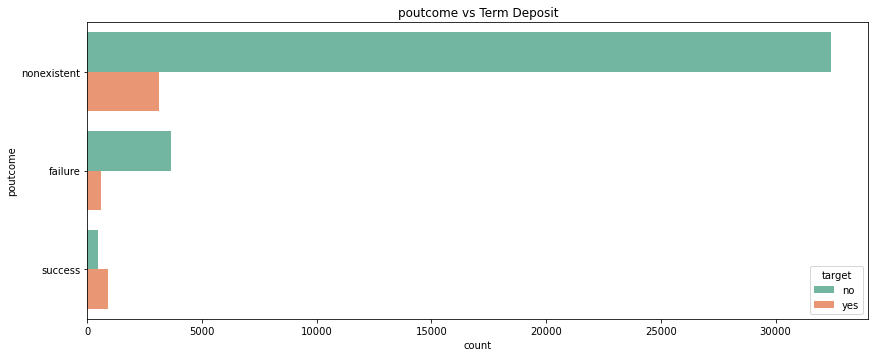

In [23]:
#poutcome of week vs Target
plt.figure(figsize=(14,12))

plt.subplot(211)
sns.countplot(y='poutcome',data=bank_df,hue='target',palette='Set2')
plt.title('poutcome vs Term Deposit')

### Check for outliers of numeric data

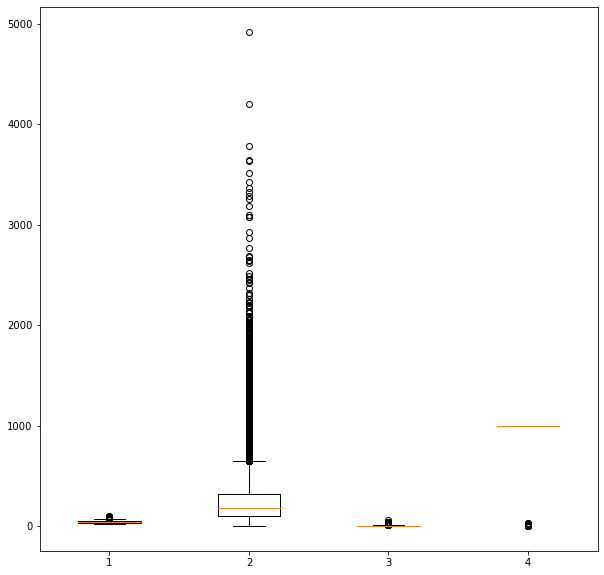

In [24]:
#Method - Boxplots
plt.figure(figsize = (10,10))
plt.boxplot ((bank_df['age'], bank_df['duration'], bank_df['campaign'], bank_df['pdays']))
plt.show()

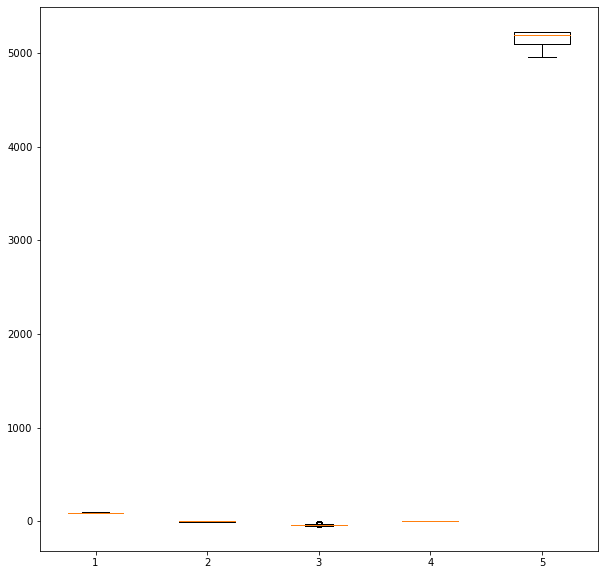

In [25]:
#Method - Boxplots
plt.figure(figsize = (10,10))
plt.boxplot ((bank_df['cons_price_idx'], bank_df['emp_var_rate'], bank_df['cons_conf_idx'], bank_df['euribor3m'], bank_df['euribor_employed']))
plt.show()

In [26]:
#As we can see there are many outlies for duration and it is also stated in dataset guidance, we shouldn't use duration

bank_df = bank_df.drop(['duration'],axis=1) 
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,euribor_employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Check for pdays values where 999 = never contacted person

In [27]:
# Imputation of 999

pd.crosstab(bank_df['pdays'], bank_df['poutcome'], normalize = True)


poutcome,failure,nonexistent,success
pdays,,,
0,0.000000,0.000000,0.000364
1,0.000000,0.000000,0.000631
2,0.000000,0.000000,0.001481
3,0.000097,0.000000,0.010561
4,0.000049,0.000000,0.002816
5,0.000097,0.000000,0.001020
6,0.000607,0.000000,0.009396
7,0.000364,0.000000,0.001093
8,0.000146,0.000000,0.000291


In [28]:

bank_df['pdays_missing'] = 0
bank_df['pdays_less_5'] = 0
bank_df['pdays_greater_15'] = 0
bank_df['pdays_bet_5_15'] = 0

bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,euribor_employed,target,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0


In [29]:
bank_df['pdays_missing'][bank_df['pdays'] == 999] = 1
bank_df['pdays_less_5'][bank_df['pdays'] < 5 ]= 1
bank_df['pdays_greater_15'][(bank_df['pdays'] > 15  )& (bank_df['pdays'] < 999) ]= 1
bank_df['pdays_bet_5_15'][(bank_df['pdays'] >=  5)  & (bank_df['pdays'] <=  15) ]= 1

<ipython-input-29-70793cb3b9e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df['pdays_missing'][bank_df['pdays'] == 999] = 1
<ipython-input-29-70793cb3b9e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df['pdays_less_5'][bank_df['pdays'] < 5 ]= 1
<ipython-input-29-70793cb3b9e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df['pdays_greater_15'][(bank_df['pdays'] > 15  )& (bank_df['pdays'] < 999) ]= 1
<ipytho

In [30]:

bank_df = bank_df.drop('pdays', axis = 1)
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,euribor_employed,target,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,yes,1,0,0,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,no,1,0,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,no,1,0,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,yes,1,0,0,0


### Handle other categorical values

#### Given Unique values
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) <br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown') <br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### target variable
21- y - has the client subscribed a term deposit? (binary: 'yes','no')

In [31]:
# tried replacing categorical values with one hot encoder and cross tabulation 


# from sklearn.preprocessing import OneHotEncoder


# bank_df_ohe= bank_df.copy()

# encoder = OneHotEncoder(sparse=False)
# categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Encode Categorical Data
#bank_df_encoded = pd.DataFrame(encoder.fit_transform(bank_df_ohe[categorical_cols]))
# bank_df_encoded.columns = encoder.get_feature_names(categorical_cols)

# Replace Categotical Data with Encoded Data
# bank_df_ohe = bank_df_ohe.drop(categorical_cols ,axis=1)
# bank_df_ohe = pd.concat([bank_df_encoded, bank_df_ohe], axis=1)

# Replace target value yes =1 &  no =0 
# bank_df_ohe['target'] = bank_df_ohe['target'].apply(lambda x: 1 if x == 'yes' else 0)

# bank_df_ohe.head()

In [32]:
### or we can use get_dummies - bank_df
# replace target value

bank_df.replace({'target': {"yes": 1,'no':0}},inplace=True)

# bank_df['target'] = bank_df['target'].apply(lambda x: 1 if x == 'yes' else 0)
target = bank_df['target']
features = bank_df.drop(['target'], axis = 1)
final_bank_df = pd.get_dummies(features,drop_first=True)
final_bank_df
final_bank_df['target'] = target

In [33]:
final_bank_df.columns


Index(['age', 'campaign', 'previous', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'euribor_employed', 'pdays_missing',
       'pdays_less_5', 'pdays_greater_15', 'pdays_bet_5_15', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',

### Correlation

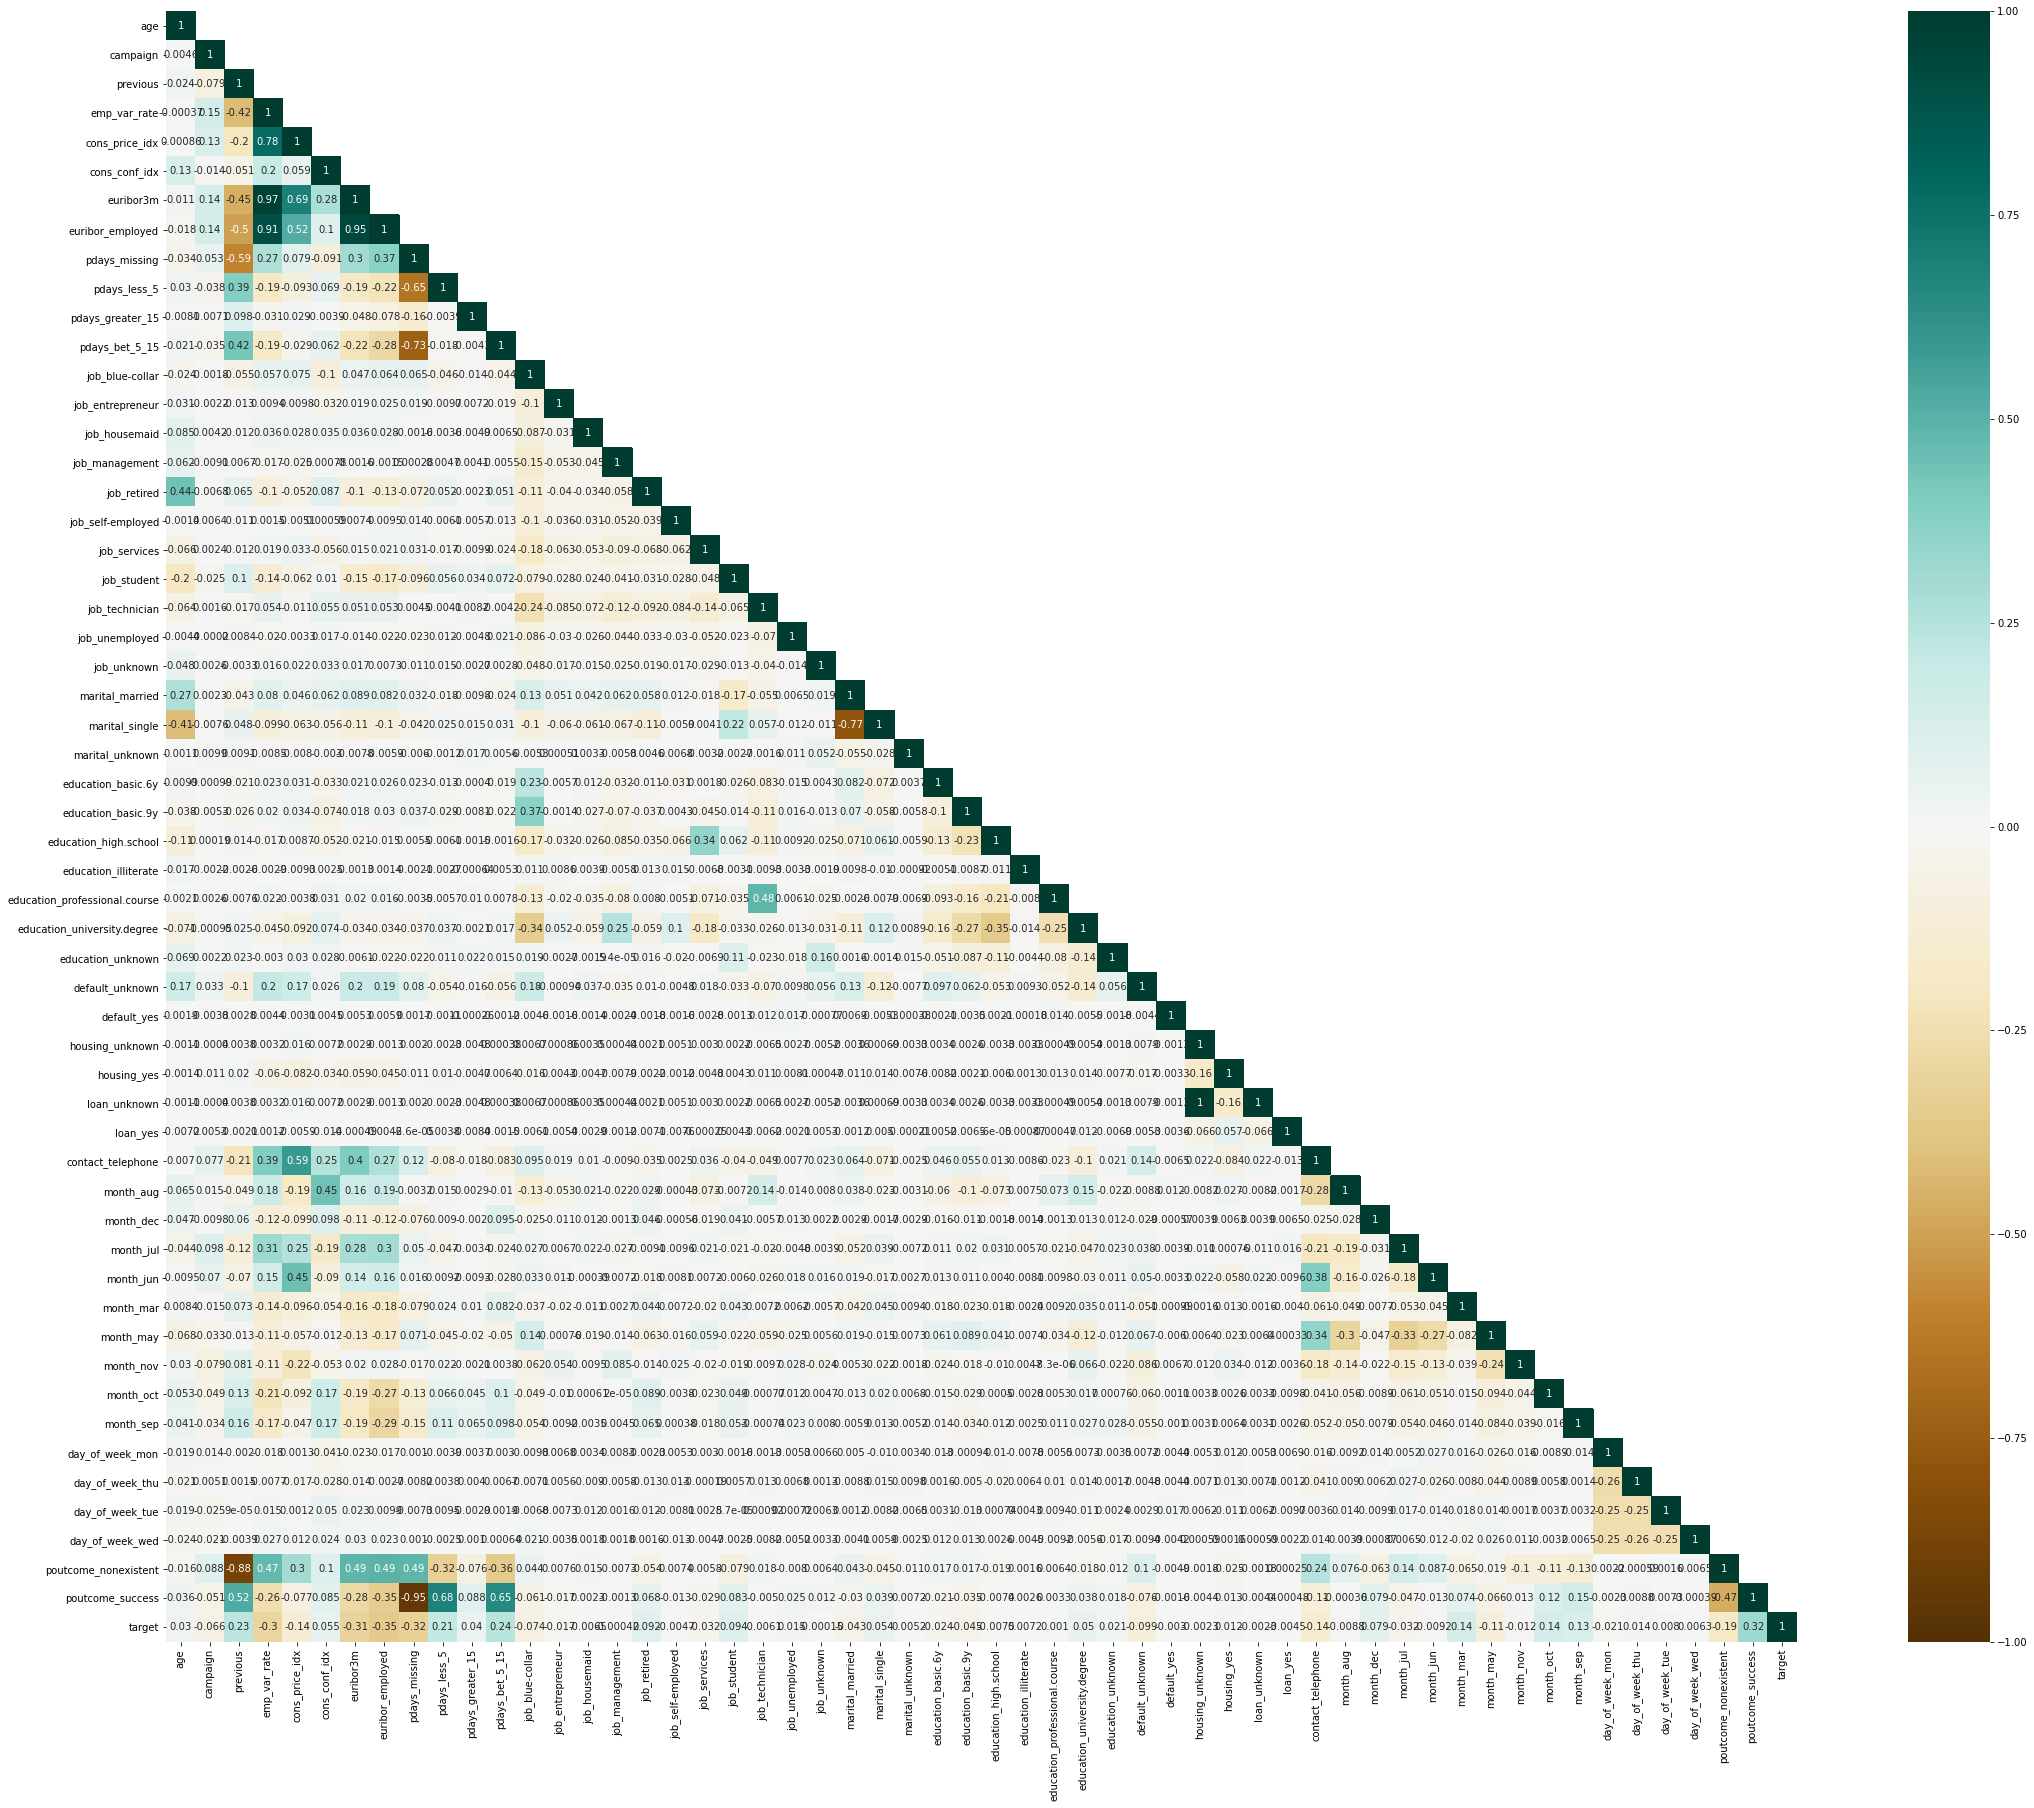

In [34]:
# Visualization of correlations (heatmap)
mask = np.triu(final_bank_df.corr(), 1)
plt.figure(figsize=(40, 30))
sns.heatmap(final_bank_df.corr(), annot=True, vmax=1, vmin = -1, square=True, cmap='BrBG', mask=mask);

In [35]:
# correlation - Defines how correlated the varibles with the target
# High corretion = higher the impact on target value
correlation = final_bank_df.corr(method='pearson', min_periods=1)
# correlation

In [36]:
#correlation with respect to label 'Y' and filtering out labels with less correlation
columns = correlation[abs(correlation['target']) > 0.3]['target']

column_list = columns.index
column_list

Index(['euribor3m', 'euribor_employed', 'pdays_missing', 'poutcome_success',
       'target'],
      dtype='object')

In [37]:
high_corr_df = pd.DataFrame(final_bank_df, columns = column_list)


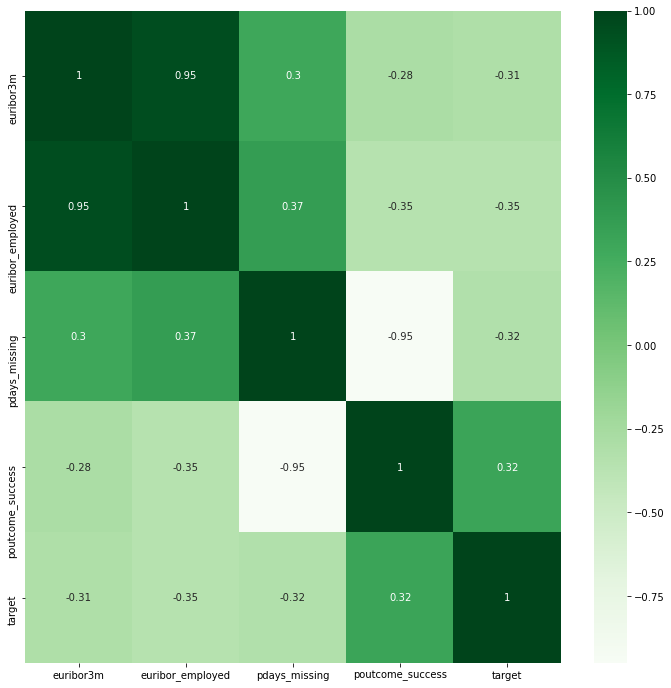

In [38]:
# Plot the coorelation matrix with only highly correlated features

#plt.figure(figsize=(12,12)
#sns.heatmap(high_corr_df.corr)

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(high_corr_df.corr(), annot=True, cmap=plt.cm.Greens)
plt.show()

### Divide data into test and train 

In [39]:
label = final_bank_df['target']
features_col = final_bank_df.drop(['target'], axis = 1)


In [40]:
# Dividing the dataset in train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(features_col, label, test_size = 0.3, random_state = 40)


In [41]:
len(X_train)

28831

In [42]:
X_train


,age,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,euribor_employed,pdays_missing,pdays_less_5,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
10944,29,1,0,1.4,94.465,-41.8,4.962,5228.1,1,0,...,0,0,0,0,0,0,0,1,1,0
21196,37,2,0,1.4,93.444,-36.1,4.963,5228.1,1,0,...,0,0,0,0,1,0,0,0,1,0
24943,36,2,1,-0.1,93.200,-42.0,4.153,5195.8,1,0,...,0,1,0,0,0,0,1,0,0,0
420,57,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,1,0,0,0,0,0,1,0,1,0
34036,33,3,0,-1.8,92.893,-46.2,1.281,5099.1,1,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,31,5,0,1.4,94.465,-41.8,4.959,5228.1,1,0,...,0,0,0,0,0,0,0,0,1,0
27640,49,2,0,-0.1,93.200,-42.0,4.021,5195.8,1,0,...,0,1,0,0,0,0,0,0,1,0
14501,26,5,0,1.4,93.918,-42.7,4.961,5228.1,1,0,...,0,0,0,0,0,0,1,0,1,0
30727,41,1,0,-1.8,92.893,-46.2,1.344,5099.1,1,0,...,1,0,0,0,0,0,1,0,1,0


In [43]:
len(X_test)

12357

### 1. Logistic Regression

In [158]:
# instantiate the model (using the default parameters)
#logreg = LogisticRegression(max_iter = 400)

logreg = LogisticRegression(max_iter = 400)

# fit the model with data
logreg.fit(X_train,y_train)

# Predict the X_test using Logistic Regression
y_pred=logreg.predict(X_test)

- Accuracy: the proportion of true results among the total number of cases examined.<br>
    Accuracy = 𝑇𝑃+𝑇𝑁 / 𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁 
    
    <br>
- Precision: used to calculate how much proportion of all data that was predicted positive was actually positive.<br>
    Precision = 𝑇𝑃 / 𝑇𝑃+𝐹𝑃 
    <br>
- Recall: used to calculate how much proportion of actual positives is correctly classified.<br>
    Recall =𝑇𝑃 / 𝑇𝑃+𝐹𝑁 
    <br>
- F1 score: a number between 0 and 1 and is the harmonic mean of precision and recall.<br>
    F1 Harmonic mean = 2*(𝑇𝑃 )/ 2(𝑇𝑃+𝐹𝑃+𝐹𝑁)

#### LR - Accuracy Precision, Recall

In [99]:

lr_acc = metrics.accuracy_score(y_test, y_pred)
lr_pre = metrics.precision_score(y_test, y_pred)
lr_rec = metrics.recall_score(y_test, y_pred)

print("===== Accuracy, Precision, Recall =====")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


===== Accuracy, Precision, Recall =====
Accuracy: 0.8935825847697662
Precision: 0.6070878274268104
Recall: 0.27097661623108665


In [46]:
print("=================== classification report ===================")
print(classification_report(y_test, y_pred))

=================== classification report ===================
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10903
           1       0.74      0.09      0.17      1454

    accuracy                           0.89     12357
   macro avg       0.81      0.54      0.55     12357
weighted avg       0.87      0.89      0.85     12357



#### LR confusion matrix

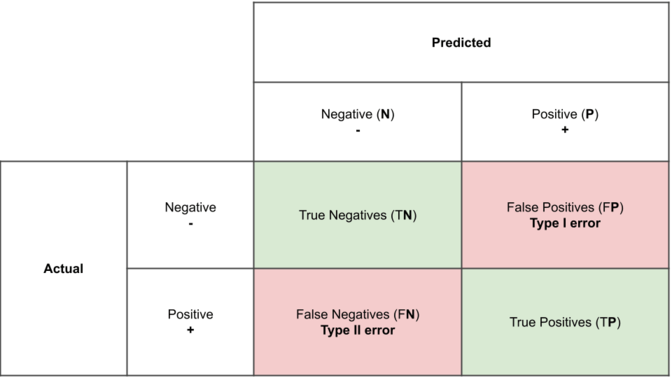

In [47]:
print("===== confusion matrix =====")
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

===== confusion matrix =====


array([[10854,    49],
       [ 1318,   136]])

#### Receiver Operating Characteristic (ROC) curve

===== Area under Curve(AUC) =====
AUC: 0.751785407673342
===== Plot Receiver Operating Characteristic(ROC) =====


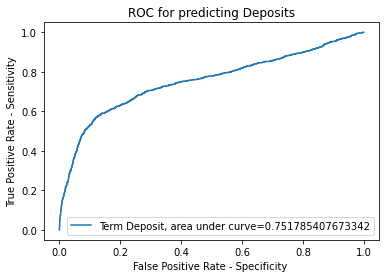

In [48]:
print("===== Area under Curve(AUC) =====")
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc_score = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc_score)

print("===== Plot Receiver Operating Characteristic(ROC) =====")
plt.plot(fpr,tpr,label="Term Deposit, area under curve="+str(auc_score))
plt.legend(loc=4)
plt.xlabel("False Positive Rate - Specificity ")
plt.ylabel("True Positive Rate - Sensitivity")
plt.title("ROC for predicting Deposits")
plt.show()

In [49]:
# created function to get Accuracy, Precision, Recall

def model_accuracy_precision_recall(y_test, y_pred):
    print("===== Accuracy, Precision, Recall =====")
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))



In [50]:
# created function to get ROC and AUC

def plot_roc(y_test, y_pred_proba):

    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc_score = metrics.roc_auc_score(y_test, y_pred_proba)
    
    print("===== Plot Receiver Operating Characteristic(ROC) =====")
    plt.plot(fpr,tpr,label="Term Deposit, area under curve="+str(auc_score))
    plt.legend(loc=4)
    plt.xlabel("False Positive Rate - Specificity ")
    plt.ylabel("True Positive Rate - Sensitivity")
    plt.title("ROC for predicting Deposits")
    plt.show()
    
    print("===== Area under Curve(AUC) =====")
    print('AUC:', auc_score)

### 2. Naive Bayes (NB)

In [51]:
# Building Naive Bayes model 
nb = GaussianNB()

# fit the model with data
nb.fit(X_train, y_train)

# Predict the Xtest data with Naive Bayes model 
y_pred = nb.predict(X_test)

#### NB - Accurancy, Recall, Precision 

In [100]:
model_accuracy_precision_recall(y_test, y_pred)

nb_acc = metrics.accuracy_score(y_test, y_pred)
nb_pre = metrics.precision_score(y_test, y_pred)
nb_rec = metrics.recall_score(y_test, y_pred)

===== Accuracy, Precision, Recall =====
Accuracy: 0.8935825847697662
Precision: 0.6070878274268104
Recall: 0.27097661623108665


In [53]:
print("=================== classification report ===================")
print(classification_report(y_test, y_pred))

=================== classification report ===================
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     10903
           1       0.45      0.43      0.44      1454

    accuracy                           0.87     12357
   macro avg       0.69      0.68      0.68     12357
weighted avg       0.87      0.87      0.87     12357



In [54]:
print("===== confusion matrix =====")
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

===== confusion matrix =====


array([[10132,   771],
       [  832,   622]])

===== Plot Receiver Operating Characteristic(ROC) =====


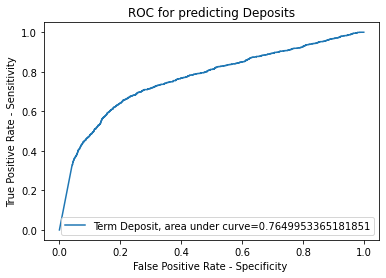

===== Area under Curve(AUC) =====
AUC: 0.7649953365181851


In [55]:
# predict the probability using Naive Bayes model
y_pred_proba = nb.predict_proba(X_test)[::,1]
plot_roc(y_test, y_pred_proba)

### 3. K-Nearest Neighbors (KNN)

In [106]:
# Building K-Nearest Neighbors model 
knearest = KNeighborsClassifier()

# fit the model with data
knearest.fit(X_train, y_train)

# Predict the Xtest data with K-Nearest Neighbors model 
y_pred = knearest.predict(X_test)

In [107]:
knn_acc = metrics.accuracy_score(y_test, y_pred)
knn_pre = metrics.precision_score(y_test, y_pred)
knn_rec = metrics.recall_score(y_test, y_pred)

model_accuracy_precision_recall(y_test, y_pred)

===== Accuracy, Precision, Recall =====
Accuracy: 0.8815246419033747
Precision: 0.4930555555555556
Recall: 0.24415405777166438


In [108]:
print("=================== classification report ===================")
print(classification_report(y_test, y_pred))

=================== classification report ===================
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10903
           1       0.49      0.24      0.33      1454

    accuracy                           0.88     12357
   macro avg       0.70      0.61      0.63     12357
weighted avg       0.86      0.88      0.86     12357



In [59]:
print("===== confusion matrix =====")
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

===== confusion matrix =====


array([[10538,   365],
       [ 1099,   355]])

===== Plot Receiver Operating Characteristic(ROC) =====


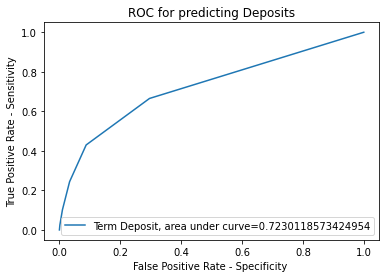

===== Area under Curve(AUC) =====
AUC: 0.7230118573424954


In [60]:
# predict the probability using K-Nearest Neighbors model
y_pred_proba = knearest.predict_proba(X_test)[::,1]
plot_roc(y_test, y_pred_proba)

### 4. Decision Tree (DT)

In [61]:
# Building Decision Tree model 
decisionTree = DecisionTreeClassifier()

# fit the model with data
decisionTree.fit(X_train, y_train)

# Predict the Xtest data with Decision Tree model 
y_pred = decisionTree.predict(X_test)

In [101]:
dt_acc = metrics.accuracy_score(y_test, y_pred)
dt_pre = metrics.precision_score(y_test, y_pred)
dt_rec = metrics.recall_score(y_test, y_pred)

model_accuracy_precision_recall(y_test, y_pred)

===== Accuracy, Precision, Recall =====
Accuracy: 0.8935825847697662
Precision: 0.6070878274268104
Recall: 0.27097661623108665


In [63]:
print("===== classification report =====")
print(classification_report(y_test, y_pred))

===== classification report =====
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     10903
           1       0.32      0.34      0.33      1454

    accuracy                           0.84     12357
   macro avg       0.62      0.62      0.62     12357
weighted avg       0.84      0.84      0.84     12357



In [64]:
print("===== confusion matrix =====")
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

===== confusion matrix =====


array([[9863, 1040],
       [ 963,  491]])

===== Plot Receiver Operating Characteristic(ROC) =====


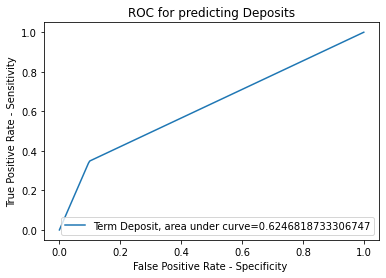

===== Area under Curve(AUC) =====
AUC: 0.6246818733306747


In [65]:
# predict the probability using K-Nearest Neighbors model
y_pred_proba = decisionTree.predict_proba(X_test)[::,1]
plot_roc(y_test, y_pred_proba)

### 5. Random Forest (RF)


In [66]:
# Building Random Forest model 
random_forest = RandomForestClassifier()

# fit the model with data
random_forest.fit(X_train, y_train)

# Predict the Xtest data with random_forest  model 
y_pred = random_forest.predict(X_test)

In [102]:
rf_acc = metrics.accuracy_score(y_test, y_pred)
rf_pre = metrics.precision_score(y_test, y_pred)
rf_rec = metrics.recall_score(y_test, y_pred)

model_accuracy_precision_recall(y_test, y_pred)

===== Accuracy, Precision, Recall =====
Accuracy: 0.8935825847697662
Precision: 0.6070878274268104
Recall: 0.27097661623108665


In [68]:
print("=================== classification report ===================")
print(classification_report(y_test, y_pred))

=================== classification report ===================
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10903
           1       0.55      0.27      0.36      1454

    accuracy                           0.89     12357
   macro avg       0.73      0.62      0.65     12357
weighted avg       0.87      0.89      0.87     12357



In [69]:
print("===== confusion matrix =====")
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

===== confusion matrix =====


array([[10577,   326],
       [ 1061,   393]])

===== Plot Receiver Operating Characteristic(ROC) =====


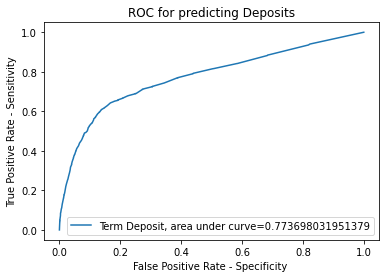

===== Area under Curve(AUC) =====
AUC: 0.773698031951379


In [70]:
# predict the probability using Random Forest model
y_pred_proba = random_forest.predict_proba(X_test)[::,1]
plot_roc(y_test, y_pred_proba)

### 6. XGBoost Algorithm (XGB)

In [71]:
# Building XGBoost model 
#The gradient boosting decision tree algorithm.
xcb_model = XGBClassifier()

# fit the model with data
xcb_model.fit(X_train, y_train)

# Predict the Xtest data with random_forest  model 
y_pred = xcb_model.predict(X_test)

[15:42:57] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [110]:
xg_acc = metrics.accuracy_score(y_test, y_pred)
xg_pre = metrics.precision_score(y_test, y_pred)
xg_rec = metrics.recall_score(y_test, y_pred)

model_accuracy_precision_recall(y_test, y_pred)

===== Accuracy, Precision, Recall =====
Accuracy: 0.8815246419033747
Precision: 0.4930555555555556
Recall: 0.24415405777166438


In [73]:

print("=================== classification report ===================")
print(classification_report(y_test, y_pred))

=================== classification report ===================
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10903
           1       0.61      0.27      0.37      1454

    accuracy                           0.89     12357
   macro avg       0.76      0.62      0.66     12357
weighted avg       0.87      0.89      0.88     12357



In [74]:
print("===== confusion matrix =====")
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

===== confusion matrix =====


array([[10648,   255],
       [ 1060,   394]])

===== Plot Receiver Operating Characteristic(ROC) =====


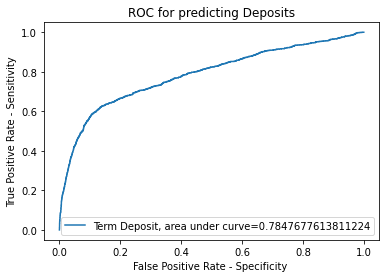

===== Area under Curve(AUC) =====
AUC: 0.7847677613811224


In [75]:
# predict the probability using xcb_model model
y_pred_proba = xcb_model.predict_proba(X_test)[::,1]
plot_roc(y_test, y_pred_proba)

### Rerun some of the models by tuning some hyperparameters.

#### 1. Random Forest tuned with hyperparameters

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [77]:
# Random Forest 

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



In [78]:
rf = RandomForestClassifier()
# perform the randomized operation using tuned parameter on random forest
rf_tuned = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=13,
    n_jobs = -1
)

# fit the model with train data
rf_tuned.fit(X_train, y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=13, verbose=2)

In [79]:
pd.DataFrame(rf_tuned.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,85.150307,0.116978,5.370982,0.061348,1800,2,4,sqrt,20,True,"{'n_estimators': 1800, 'min_samples_split': 2,...",0.903236,0.902914,0.901249,0.902466,0.000871,1
6,82.277685,0.684260,5.239430,0.294793,1400,2,4,auto,110,False,"{'n_estimators': 1400, 'min_samples_split': 2,...",0.903132,0.902289,0.901145,0.902189,0.000814,2
3,70.115914,0.842785,4.794695,0.192482,1400,10,2,sqrt,50,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.902820,0.902601,0.901041,0.902154,0.000792,3
5,79.962112,0.195398,7.231071,0.287377,1800,10,1,auto,50,True,"{'n_estimators': 1800, 'min_samples_split': 10...",0.902403,0.902081,0.901041,0.901842,0.000582,4
1,29.334321,0.215595,3.094313,0.048060,1000,5,4,auto,10,True,"{'n_estimators': 1000, 'min_samples_split': 5,...",0.903028,0.903434,0.898959,0.901807,0.002020,5
4,26.251250,2.608430,1.865545,0.278248,800,2,4,sqrt,10,True,"{'n_estimators': 800, 'min_samples_split': 2, ...",0.902612,0.903538,0.898959,0.901703,0.001977,6
9,22.327485,0.279371,1.563821,0.138909,600,10,1,auto,90,True,"{'n_estimators': 600, 'min_samples_split': 10,...",0.901779,0.902601,0.899896,0.901426,0.001132,7
7,26.488087,0.893327,1.940100,0.006180,600,10,1,auto,60,True,"{'n_estimators': 600, 'min_samples_split': 10,...",0.902195,0.902185,0.899792,0.901391,0.001131,8
8,56.269786,6.875913,2.810874,0.536038,1400,2,1,auto,None,True,"{'n_estimators': 1400, 'min_samples_split': 2,...",0.899802,0.898959,0.894901,0.897888,0.002140,9
2,15.924837,1.005212,1.050563,0.192261,200,2,1,sqrt,40,False,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.891479,0.891988,0.889594,0.891020,0.001029,10


In [80]:
rf_tuned.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [81]:
y_pred_random = rf_tuned.best_estimator_.predict(X_test)

In [104]:
rf_paramtuned_acc = metrics.accuracy_score(y_test, y_pred_random)
rf_paramtuned_pre = metrics.precision_score(y_test, y_pred_random)
rf_paramtuned_rec = metrics.recall_score(y_test, y_pred_random)

model_accuracy_precision_recall(y_test, y_pred_random)

===== Accuracy, Precision, Recall =====
Accuracy: 0.8952011005907583
Precision: 0.6525911708253359
Recall: 0.23383768913342504


In [83]:
print("=================== classification report ===================")
print(classification_report(y_test, y_pred_random))

=================== classification report ===================
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10903
           1       0.65      0.23      0.34      1454

    accuracy                           0.90     12357
   macro avg       0.78      0.61      0.64     12357
weighted avg       0.88      0.90      0.87     12357



===== Plot Receiver Operating Characteristic(ROC) =====


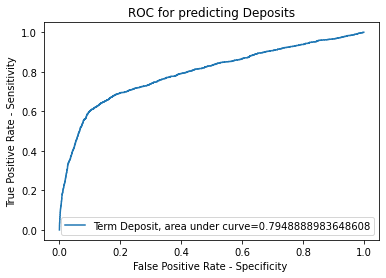

===== Area under Curve(AUC) =====
AUC: 0.7948888983648608


In [84]:
# predict the probability using xcb_model 
y_pred_proba = rf_tuned.best_estimator_.predict_proba(X_test)[::,1]
plot_roc(y_test, y_pred_proba)

#### 2. XGBoost tuned with hyperparameters
https://xgboost.readthedocs.io/en/latest/parameter.html

https://machinelearningmastery.com/tune-learning-rate-for-gradient-boosting-with-xgboost-in-python/

In [85]:
from scipy import stats
param_dist = {'n_estimators': stats.randint(550, 1200),
              'learning_rate': stats.uniform(0.01, 0.2),
              'subsample': stats.uniform(0.7, 0.3),
              'max_depth': [5, 6, 7, 8, 9, 10],
              'colsample_bytree': stats.uniform(0.5, 0.5),
              'min_child_weight': [2, 3, 4, 5]
             }

xgbc = XGBClassifier(use_label_encoder=False)


In [86]:
xgb_tuned = RandomizedSearchCV(
    estimator=xgbc,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=15,
    n_jobs = -1
)

xgb_tuned.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[15:53:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb4f77ea340>,
                                        'learning

In [87]:
pd.DataFrame(xgb_tuned.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,63.498090,0.629453,0.047360,0.003968,0.924409,0.045779,5,2,749,0.977993,"{'colsample_bytree': 0.9244088486342894, 'lear...",0.901987,0.903954,0.898959,0.901634,0.002054,1
9,69.393600,20.588453,0.098004,0.011650,0.749746,0.036527,10,4,637,0.744492,"{'colsample_bytree': 0.749746209864542, 'learn...",0.900947,0.901561,0.894901,0.899136,0.003005,2
5,73.500148,0.352390,0.071499,0.005002,0.554723,0.103019,5,2,905,0.918494,"{'colsample_bytree': 0.554723324170915, 'learn...",0.898138,0.898543,0.895421,0.897367,0.001386,3
2,135.622713,1.031394,0.107663,0.007717,0.958815,0.062829,10,5,707,0.950063,"{'colsample_bytree': 0.9588149489182812, 'lear...",0.896785,0.899584,0.893132,0.896500,0.002642,4
3,63.941963,0.567417,0.064652,0.004702,0.852958,0.164929,6,5,646,0.999563,"{'colsample_bytree': 0.8529583217453449, 'lear...",0.895432,0.900520,0.892508,0.896153,0.003311,5
4,89.509426,1.983244,0.078431,0.006643,0.686393,0.162102,5,3,1103,0.983512,"{'colsample_bytree': 0.686393489163944, 'learn...",0.896785,0.897607,0.891259,0.895217,0.002819,6
8,68.973555,1.434461,0.056307,0.006078,0.83202,0.156608,5,2,793,0.708748,"{'colsample_bytree': 0.8320203239352673, 'lear...",0.893247,0.896046,0.890531,0.893275,0.002252,7
1,101.473520,0.469027,0.094981,0.007264,0.512477,0.17446,10,5,573,0.77497,"{'colsample_bytree': 0.5124765161645372, 'lear...",0.890854,0.892508,0.886785,0.890049,0.002405,8
6,162.727879,0.115725,0.118199,0.007796,0.675258,0.128652,8,2,1035,0.876634,"{'colsample_bytree': 0.6752576922541306, 'lear...",0.888669,0.888137,0.885952,0.887586,0.001176,9
7,163.709954,2.056999,0.106290,0.011083,0.913336,0.148955,10,3,882,0.953099,"{'colsample_bytree': 0.9133364946394481, 'lear...",0.887109,0.888450,0.884079,0.886546,0.001828,10


In [88]:
xgb_tuned.best_params_

{'colsample_bytree': 0.9244088486342894,
 'learning_rate': 0.0457791849841997,
 'max_depth': 5,
 'min_child_weight': 2,
 'n_estimators': 749,
 'subsample': 0.9779928472563628}

In [89]:
y_pred_tuned = xgb_tuned.best_estimator_.predict(X_test)

In [112]:
xg_paramtuned_acc = metrics.accuracy_score(y_test, y_pred_tuned)
xg_paramtuned_pre = metrics.precision_score(y_test, y_pred_tuned)
xg_paramtuned_rec = metrics.recall_score(y_test, y_pred_tuned)

model_accuracy_precision_recall(y_test, y_pred_tuned)

===== Accuracy, Precision, Recall =====
Accuracy: 0.896091284292304
Precision: 0.6445578231292517
Recall: 0.26066024759284734


In [91]:
print("=================== classification report ===================")
print(classification_report(y_test, y_pred_tuned))

=================== classification report ===================
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10903
           1       0.64      0.26      0.37      1454

    accuracy                           0.90     12357
   macro avg       0.78      0.62      0.66     12357
weighted avg       0.88      0.90      0.88     12357



===== Plot Receiver Operating Characteristic(ROC) =====


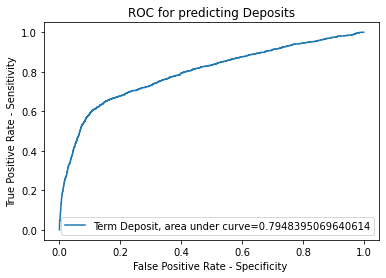

===== Area under Curve(AUC) =====
AUC: 0.7948395069640614


In [92]:
# predict the probability using xgboost parameter tuning 
y_pred_proba = xgb_tuned.best_estimator_.predict_proba(X_test)[::,1]
plot_roc(y_test, y_pred_proba)

### Model Comparison 

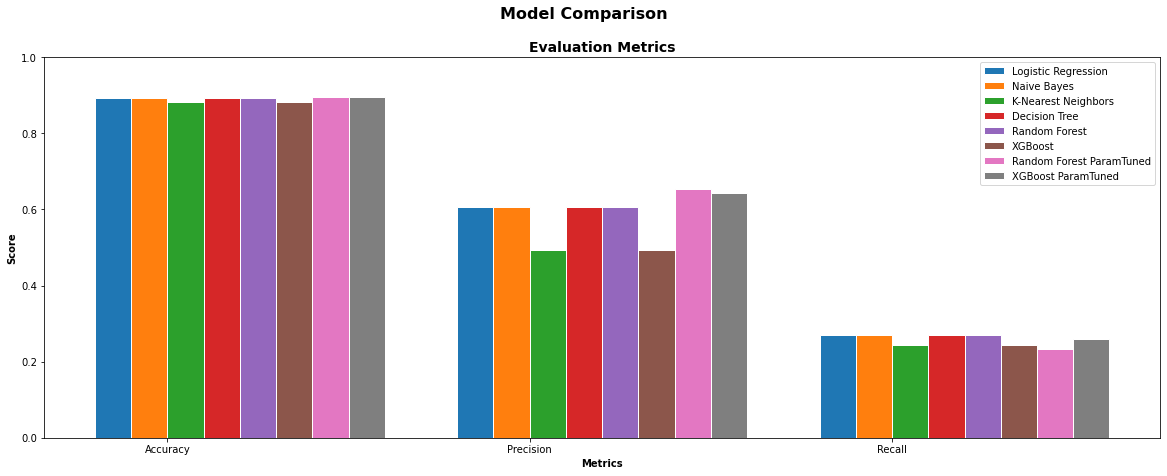

In [113]:
# Intitialize figure with two plots
#fig, (ax1, ax2) = plt.subplots(1, 2)
fig, (ax1) = plt.subplots(1)

fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(20)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1

logi_regre_score = [lr_acc, lr_pre, lr_rec] 
naive_bayes_score = [nb_acc, nb_pre, nb_rec] 
k_nearest_score = [knn_acc, knn_pre, knn_rec]  
decision_tree_score = [dt_acc, dt_pre, dt_rec] 
random_forest_score = [rf_acc, rf_pre, rf_rec]  
xgboost_score = [xg_acc, xg_pre, xg_rec] 

random_forest_paramtuned_score = [rf_paramtuned_acc, rf_paramtuned_pre, rf_paramtuned_rec]  
xgboost_paramtuned_score = [xg_paramtuned_acc, xg_paramtuned_pre, xg_paramtuned_rec] 


## Set position of bar on X axis
r1 = np.arange(len(logi_regre_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]



## Make the plot
ax1.bar(r1, logi_regre_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, naive_bayes_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r3, k_nearest_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r4, decision_tree_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r5, random_forest_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r6, xgboost_score, width=barWidth, edgecolor='white', label='XGBoost')

ax1.bar(r7, random_forest_paramtuned_score, width=barWidth, edgecolor='white', label='Random Forest ParamTuned')
ax1.bar(r8, xgboost_paramtuned_score, width=barWidth, edgecolor='white', label='XGBoost ParamTuned')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(logi_regre_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()


plt.show()

### Conclusion

For accuracy almost every model performed well, except knn and xgboost, but xgboost performed well after tuning hyper parameters. <br>
For Precision RF with tuned param perfomed well. <br>


### Store  Prediction

In [93]:
df_bank = bank_df.copy()
df_bank['term_deposite_prediction'] = rf_tuned.predict(features_col)
df_bank['term_deposite_prediction'] = df_bank['term_deposite_prediction'].apply(lambda x: 'yes' if x==1 else 'no')

# Save new dataframe into csv file
df_bank.to_csv('bank_term_deposite_prediction.csv', index=False)

df_bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons_price_idx,cons_conf_idx,euribor3m,euribor_employed,target,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15,term_deposite_prediction
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,0,1,0,0,0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,0,1,0,0,0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,0,1,0,0,0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,0,1,0,0,0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,0,1,0,0,0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,0,1,0,0,0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,0,1,0,0,0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,0,1,0,0,0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,0,1,0,0,0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,0,1,0,0,0,no


### Model Performance without deleting duration column (high impact on target i.e duration = 0, target = 'no') as suggested in presentation

In [114]:
# Load data from CSV file
# Using pdays column as it is
path = 'bank-additional/bank-additional-full.csv'
df_bank = pd.read_csv(path, sep = ';')
df_bank.shape

(41188, 21)

In [116]:
# Renaming columns with meangingful name for understanding purpose
df_bank.rename(columns={"emp.var.rate":"emp_var_rate", "cons.price.idx":"cons_price_idx", "cons.conf.idx":"cons_conf_idx", "nr.employed":"euribor_employed", "y":"target"}, inplace=True)


In [117]:
df_bank.replace({'target': {"yes": 1,'no':0}},inplace=True)

# bank_df['target'] = bank_df['target'].apply(lambda x: 1 if x == 'yes' else 0)
target = df_bank['target']
features = df_bank.drop(['target'], axis = 1)
final_df_bank = pd.get_dummies(features,drop_first=True)
final_df_bank
final_df_bank['target'] = target

#### Divide data into test and train data (70%-30%)

In [118]:
label1 = final_df_bank['target']
features_col1 = final_df_bank.drop(['target'], axis = 1)

In [119]:
# Dividing the dataset in train (70%) and test (30%)
X_train1, X_test1, y_train1, y_test1 = train_test_split(features_col1, label1, test_size = 0.3, random_state = 40)


#### 1. Logistic Regression

In [126]:
# instantiate the model (using the default parameters)

logreg1 = LogisticRegression(max_iter = 4000)

# fit the model with data
logreg1.fit(X_train1,y_train1)

# Predict the X_test using Logistic Regression
y_pred1 =logreg1.predict(X_test1)

In [127]:
lr_acc1 = metrics.accuracy_score(y_test1, y_pred1)
lr_pre1 = metrics.precision_score(y_test1, y_pred1)
lr_rec1 = metrics.recall_score(y_test1, y_pred1)

#### 2. Naive Bayes

In [128]:
nb1 = GaussianNB()

# fit the model with data
nb1.fit(X_train1, y_train1)

# Predict the Xtest data with Naive Bayes model 
y_pred1 = nb1.predict(X_test1)

In [129]:
nb_acc1 = metrics.accuracy_score(y_test1, y_pred1)
nb_pre1 = metrics.precision_score(y_test1, y_pred1)
nb_rec1 = metrics.recall_score(y_test1, y_pred1)


#### 3. K-Nearest Neighbours

In [131]:
# Building K-Nearest Neighbors model 
knearest1 = KNeighborsClassifier()

# fit the model with data
knearest1.fit(X_train1, y_train1)

# Predict the Xtest data with K-Nearest Neighbors model 
y_pred1 = knearest1.predict(X_test1)

In [132]:
knn_acc1 = metrics.accuracy_score(y_test1, y_pred1)
knn_pre1 = metrics.precision_score(y_test1, y_pred1)
knn_rec1 = metrics.recall_score(y_test1, y_pred1)


#### 4. Decision Tree

In [133]:
# Building Decision Tree model 
decisionTree1 = DecisionTreeClassifier()

# fit the model with data
decisionTree1.fit(X_train1, y_train1)

# Predict the Xtest data with Decision Tree model 
y_pred1 = decisionTree1.predict(X_test1)

In [134]:
dt_acc1 = metrics.accuracy_score(y_test1, y_pred1)
dt_pre1 = metrics.precision_score(y_test1, y_pred1)
dt_rec1 = metrics.recall_score(y_test1, y_pred1)

#### 5. Random Forest

In [136]:
# Building Random Forest model 
random_forest1 = RandomForestClassifier()

# fit the model with data
random_forest1.fit(X_train1, y_train1)

# Predict the Xtest data with random_forest  model 
y_pred1 = random_forest1.predict(X_test1)



In [137]:

rf_acc1 = metrics.accuracy_score(y_test1, y_pred1)
rf_pre1 = metrics.precision_score(y_test1, y_pred1)
rf_rec1 = metrics.recall_score(y_test1, y_pred1)

#### 6. XGBoost 

In [147]:
#The gradient boosting decision tree algorithm.
xcb_model1 = XGBClassifier()

# fit the model with data
xcb_model1.fit(X_train1, y_train1)

# Predict the Xtest data with random_forest  model 
y_pred1 = xcb_model1.predict(X_test1)


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [148]:
xg_acc1 = metrics.accuracy_score(y_test1, y_pred1)
xg_pre1 = metrics.precision_score(y_test1, y_pred1)
xg_rec1 = metrics.recall_score(y_test1, y_pred1)

#### Parameter tuning

#### 1. Random Forest with tuned parameter

In [140]:
# Number of trees in random forest
n_estimators1 = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features1 = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth1 = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth1.append(None)
# Minimum number of samples required to split a node
min_samples_split1 = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf1 = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap1 = [True, False]


In [143]:
random_grid1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [144]:
rf1 = RandomForestClassifier()
# perform the randomized operation using tuned parameter on random forest
rf_tuned1 = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=13,
    n_jobs = -1
)

# fit the model with train data
rf_tuned1.fit(X_train1, y_train1)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=13, verbose=2)

In [145]:

y_pred_random1 = rf_tuned1.best_estimator_.predict(X_test1)


In [146]:
rf_paramtuned_acc1 = metrics.accuracy_score(y_test1, y_pred_random1)
rf_paramtuned_pre1 = metrics.precision_score(y_test1, y_pred_random1)
rf_paramtuned_rec1 = metrics.recall_score(y_test1, y_pred_random1)

#### 2. XGBoost

In [149]:
from scipy import stats
param_dist1 = {'n_estimators': stats.randint(550, 1200),
              'learning_rate': stats.uniform(0.01, 0.2),
              'subsample': stats.uniform(0.7, 0.3),
              'max_depth': [5, 6, 7, 8, 9, 10],
              'colsample_bytree': stats.uniform(0.5, 0.5),
              'min_child_weight': [2, 3, 4, 5]
             }

xgbc1 = XGBClassifier(use_label_encoder=False)



In [150]:


xgb_tuned1 = RandomizedSearchCV(
    estimator=xgbc,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=15,
    n_jobs = -1
)

xgb_tuned1.fit(X_train1, y_train1)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[16:52:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb4f77ea340>,
                                        'learning

In [153]:
y_pred_tuned1 = xgb_tuned1.best_estimator_.predict(X_test1)


In [154]:

xg_paramtuned_acc1 = metrics.accuracy_score(y_test1, y_pred_tuned1)
xg_paramtuned_pre1 = metrics.precision_score(y_test1, y_pred_tuned1)
xg_paramtuned_rec1 = metrics.recall_score(y_test1, y_pred_tuned1)

### Model Comparision With and Without deleting duration column

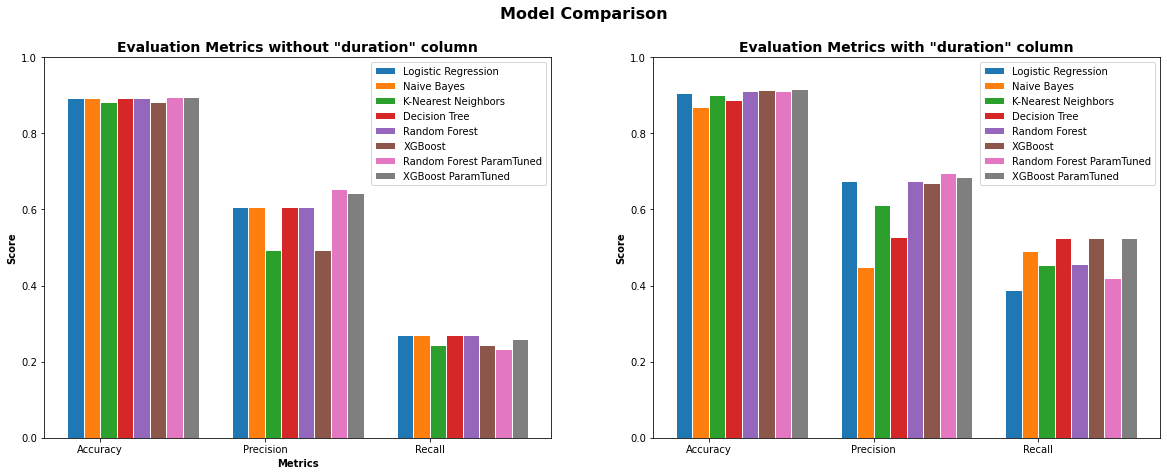

In [157]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)


fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(20)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1

logi_regre_score = [lr_acc, lr_pre, lr_rec] 
naive_bayes_score = [nb_acc, nb_pre, nb_rec] 
k_nearest_score = [knn_acc, knn_pre, knn_rec]  
decision_tree_score = [dt_acc, dt_pre, dt_rec] 
random_forest_score = [rf_acc, rf_pre, rf_rec]  
xgboost_score = [xg_acc, xg_pre, xg_rec] 

random_forest_paramtuned_score = [rf_paramtuned_acc, rf_paramtuned_pre, rf_paramtuned_rec]  
xgboost_paramtuned_score = [xg_paramtuned_acc, xg_paramtuned_pre, xg_paramtuned_rec] 


## Set position of bar on X axis
r1 = np.arange(len(logi_regre_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]



## Make the plot
ax1.bar(r1, logi_regre_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, naive_bayes_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r3, k_nearest_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r4, decision_tree_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r5, random_forest_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r6, xgboost_score, width=barWidth, edgecolor='white', label='XGBoost')

ax1.bar(r7, random_forest_paramtuned_score, width=barWidth, edgecolor='white', label='Random Forest ParamTuned')
ax1.bar(r8, xgboost_paramtuned_score, width=barWidth, edgecolor='white', label='XGBoost ParamTuned')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(logi_regre_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics without "duration" column', fontsize=14, fontweight='bold')
ax1.legend()


# Second plot
## set bar size
barWidth = 0.1

logi_regre_score1 = [lr_acc1, lr_pre1, lr_rec1] 
naive_bayes_score1 = [nb_acc1, nb_pre1, nb_rec1] 
k_nearest_score1 = [knn_acc1, knn_pre1, knn_rec1]  
decision_tree_score1 = [dt_acc1, dt_pre1, dt_rec1] 
random_forest_score1 = [rf_acc1, rf_pre1, rf_rec1]  
xgboost_score1 = [xg_acc1, xg_pre1, xg_rec1] 

random_forest_paramtuned_score1 = [rf_paramtuned_acc1, rf_paramtuned_pre1, rf_paramtuned_rec1]  
xgboost_paramtuned_score1 = [xg_paramtuned_acc1, xg_paramtuned_pre1, xg_paramtuned_rec1] 


## Set position of bar on X axis
p1 = np.arange(len(logi_regre_score1))
p2 = [x + barWidth for x in p1]
p3 = [x + barWidth for x in p2]
p4 = [x + barWidth for x in p3]
p5 = [x + barWidth for x in p4]
p6 = [x + barWidth for x in p5]

p7 = [x + barWidth for x in p6]
p8 = [x + barWidth for x in p7]



## Make the plot
ax2.bar(p1, logi_regre_score1, width=barWidth, edgecolor='white', label='Logistic Regression')
ax2.bar(p2, naive_bayes_score1, width=barWidth, edgecolor='white', label='Naive Bayes')
ax2.bar(p3, k_nearest_score1, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax2.bar(p4, decision_tree_score1, width=barWidth, edgecolor='white', label='Decision Tree')
ax2.bar(p5, random_forest_score1, width=barWidth, edgecolor='white', label='Random Forest')
ax2.bar(p6, xgboost_score1, width=barWidth, edgecolor='white', label='XGBoost')

ax2.bar(p7, random_forest_paramtuned_score1, width=barWidth, edgecolor='white', label='Random Forest ParamTuned')
ax2.bar(p8, xgboost_paramtuned_score1, width=barWidth, edgecolor='white', label='XGBoost ParamTuned')

## Configure x and y axis
ax2.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall']
ax2.set_xticks([r + (barWidth * 1.5) for r in range(len(logi_regre_score1))], )
ax2.set_xticklabels(labels)
ax2.set_ylabel('Score', fontweight='bold')
ax2.set_ylim(0, 1)

## Create legend & title
ax2.set_title('Evaluation Metrics with "duration" column', fontsize=14, fontweight='bold')
ax2.legend()

plt.show()

####   Thank You! 

####  Any Questions??